# Rice Leaf Diseases Detection



## Input

### Library

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

### Dataset

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/leaf_dis.zip

Archive:  /content/drive/MyDrive/leaf_dis.zip
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0378.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0379.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0380.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC

In [31]:
data = '/content/rice_leaf_diseases'

In [32]:
classes=[]
for file in os.listdir(data):
    classes+=[file]
print(classes)
print(len(classes))

['Leaf smut', 'Bacterial leaf blight', 'Brown spot']
3


In [33]:
brownspot = [data + '/Brown spot/' + img for img in os.listdir(data + '/Brown spot')[:9]]
leafblight = [data  + '/Bacterial leaf blight/' + img for img in os.listdir(data + '/Bacterial leaf blight')[:9]]
leafsmut = [data  + '/Leaf smut/' + img for img in os.listdir(data + '/Leaf smut')[:9]]

#### Brown Spot

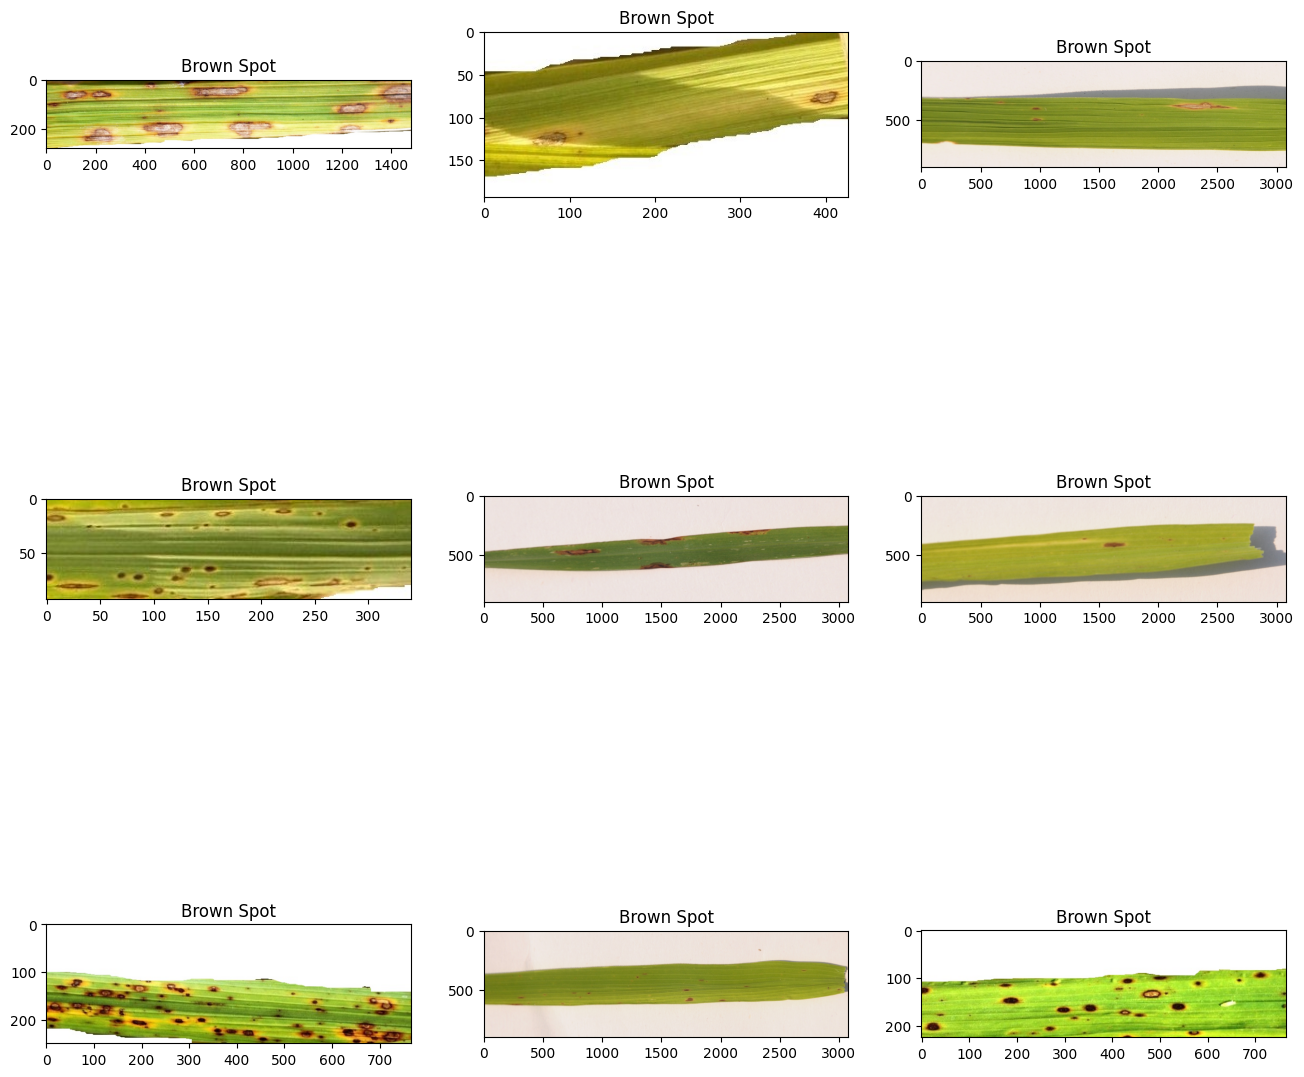

In [34]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

#### Leaf Blight

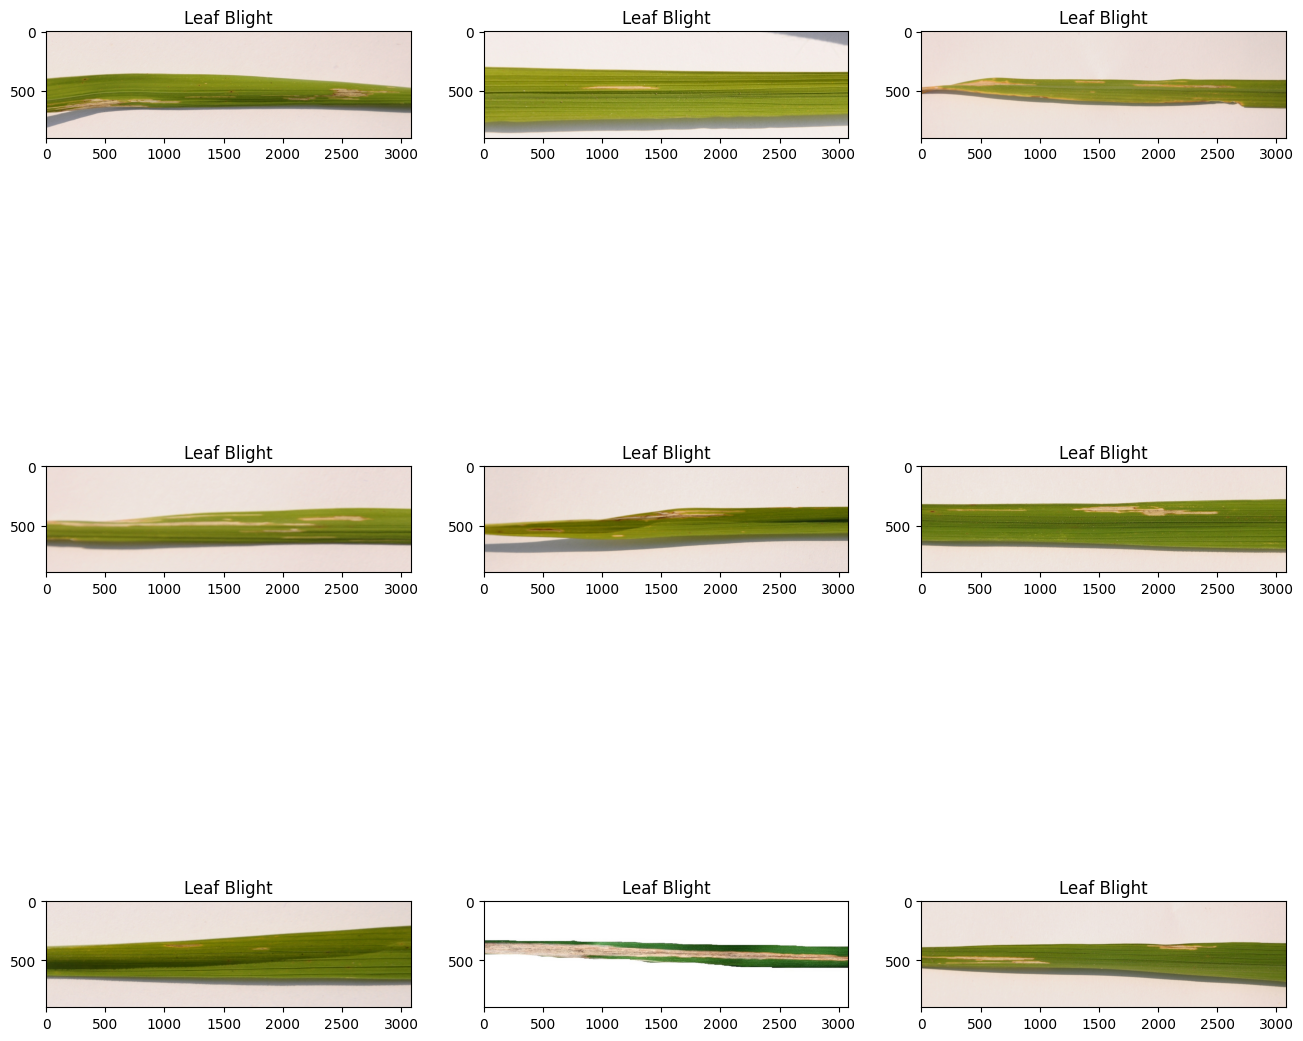

In [35]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blight")

#### Leaf Smut

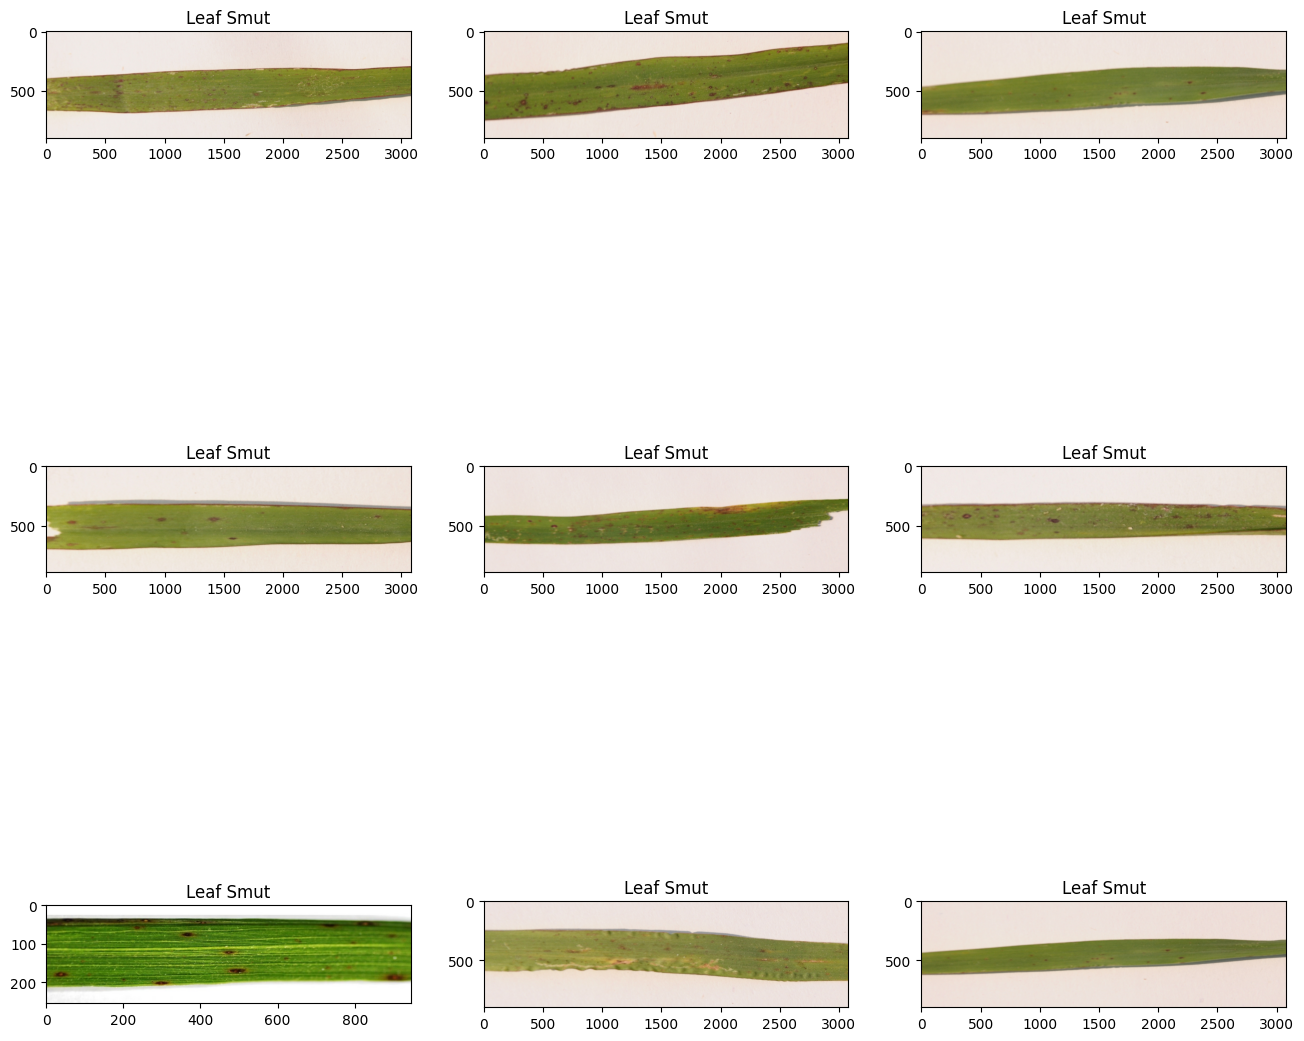

In [36]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafsmut):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Smut")

#Data preprocessing and Data Splitting

In [37]:
label = []
image = []
image_width = 500
image_height = 500

# First loop for label names
# secound lopp for image names
for i in os.listdir("/content/rice_leaf_diseases/"):
        for j in  os.listdir("/content/rice_leaf_diseases/"+i):
            img = cv2.imread("/content/rice_leaf_diseases/"+i+"/"+j)
            img = cv2.resize(img,(image_width,image_height))
            label.append(i)
            image.append(img)

x = np.array(image)
y = np.array(label)

x.shape , y.shape

((120, 500, 500, 3), (120,))

In [38]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [39]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)


In [40]:
# Scale value
x_train = x_train/255.0
x_test = x_test/255.0

In [41]:
# Data Augmentation
data_agu = keras.Sequential([
            keras.layers.experimental.preprocessing.RandomFlip(),
            keras.layers.experimental.preprocessing.RandomRotation(0.4),
            keras.layers.experimental.preprocessing.RandomContrast(0.4)
            ])

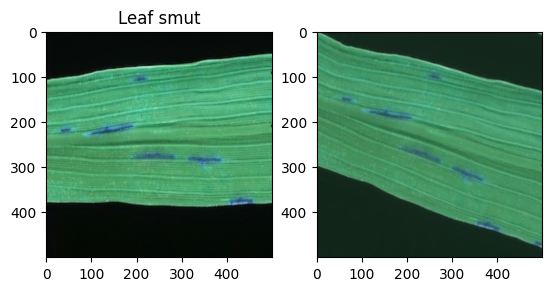

In [42]:
# Orignal Image
plt.subplot(1,2,1)
plt.imshow(x[20] / 255.0)  # Normalize the image for displaying
plt.title(label[20])

# Data Agumentataion Applayed Image
plt.subplot(1,2,2)
augmented_image = data_agu(x)[20]  # Augment the image
plt.imshow(augmented_image / 255.0)  # Normalize the augmented image for displaying


## Creating CNN Model

In [46]:

# Define the model architecture
model = Sequential([
    data_agu,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(3)
])



In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epoch=100
history = model.fit(x_train,y_train,epochs=epoch, validation_data=(x_test,y_test))

Epoch 1/100
3/3 [==============================] - 18s 992ms/step - loss: 24.9384 - accuracy: 0.3646 - val_loss: 19.3482 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 1s 197ms/step - loss: 12.9239 - accuracy: 0.3333 - val_loss: 2.6466 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 1s 226ms/step - loss: 1.7536 - accuracy: 0.3854 - val_loss: 1.1918 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 1s 227ms/step - loss: 1.1099 - accuracy: 0.3958 - val_loss: 1.1115 - val_accuracy: 0.2917
Epoch 5/100
3/3 [==============================] - 1s 227ms/step - loss: 1.1315 - accuracy: 0.2917 - val_loss: 1.0784 - val_accuracy: 0.3750
Epoch 6/100
3/3 [==============================] - 1s 228ms/step - loss: 1.0314 - accuracy: 0.4271 - val_loss: 1.1138 - val_accuracy: 0.3750
Epoch 7/100
3/3 [==============================] - 1s 195ms/step - loss: 0.9960 - accuracy: 0.4062 - val_loss: 1.0577 - val_accuracy: 0.3750
Epoch 8/1

In [50]:
# Display the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 500, 500, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 250, 250, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)     

In [51]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.4504 - accuracy: 0.8333


[0.4504155218601227, 0.8333333134651184]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluate The CNN Model

### Loss & Accuracy

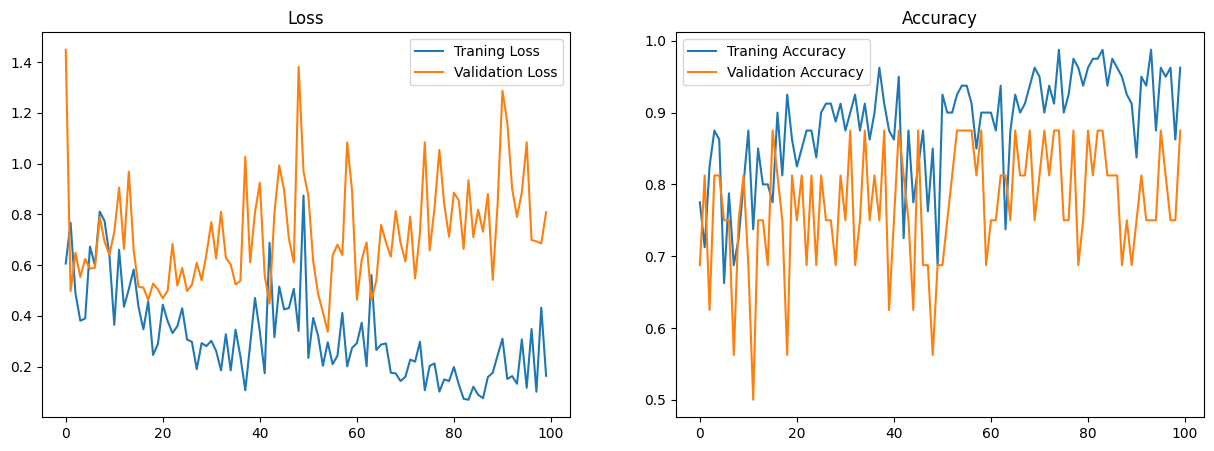

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss,label="Traning Loss")
plt.plot(range(epoch),val_loss,label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epoch),accuracy,label="Traning Accuracy")
plt.plot(range(epoch),val_accuracy,label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

#Checking with dowmloaded images

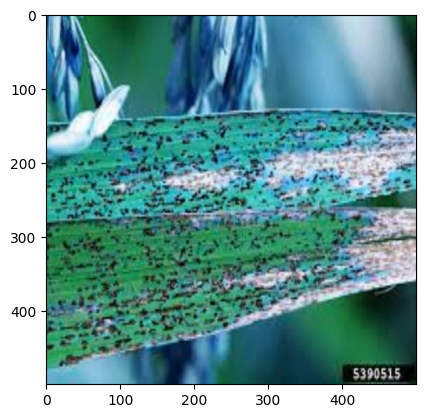

1/1 [==============================] - 0s 38ms/step
Predicted Label: 2
Predicted Emotion: ['Leaf smut']


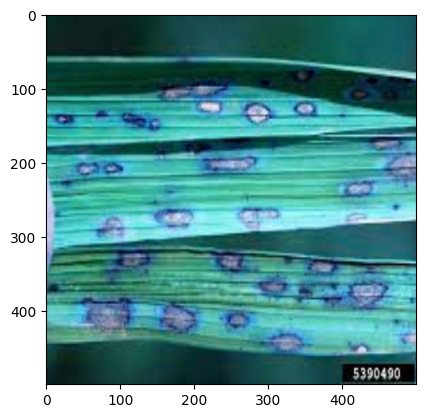

1/1 [==============================] - 0s 29ms/step
Predicted Label: 1
Predicted Emotion: ['Brown spot']


In [ ]:
image_paths = ["/content/smut.jpg", "/content/b_spots.jpg"]

# Loop through each image path
for image_path in image_paths:
    try_image = cv2.imread(image_path)
    try_image = cv2.resize(try_image, (image_width, image_height))
    try_image = try_image / 255.0

    plt.imshow(try_image)
    plt.show()

    try_image = try_image.reshape(1, image_width, image_height, 3)

    if len(try_image.shape) > 2 and try_image.shape[2] == 4:
        q = cv2.cvtColor(try_image, cv2.COLOR_BGRA2BGR)
        prediction = np.argmax(model.predict([q]))
    else:
        prediction = np.argmax(model.predict([try_image]))

    print("Predicted Label:", prediction)
    print("Predicted Emotion:", encode.inverse_transform([prediction]))